In [1]:
"""
Name: con_distributions.ipynb
Authors: Stephan Meighen-Berger
Plots and stores the standard distributions
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from contagion import Contagion, config

In [6]:
# Options
# General
config['general']['trace spread'] = True
config['general']["random state seed"] = 1337
# Population
config['population']['population size'] = 100
config['population']['social circle pdf']["mean"] = 10
config['population']['social circle interactions pdf']["mean"] = 6
config['population']["re-use population"] = False
# Infection
config['infection']['infected'] = 1
config['infection']['infection probability pdf']['mean'] = 6.
config['infection']['infection probability pdf']['max_val'] = 0.3

In [7]:
# Creating a contagion object
contagion = Contagion()

In [8]:
# Infection probability
infect_prob = contagion.infection.pdf_infection_prob
# The latent distribution
latent_distr = contagion.infection.latent_duration
# The incubation distribution
incuba_distr = contagion.infection.incubation_duration
# The infectious distribution
infect_distr = contagion.infection.infectious_duration

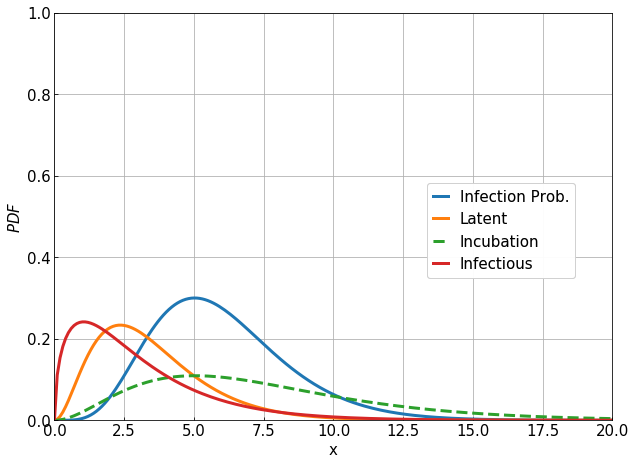

In [9]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
# ---------------------------------------------------------------------------------
# The range
x = np.linspace(0., 100., 1000)
# ---------------------------------------------------------------------------------
# Infection probability
ax1.plot(x, infect_prob.pdf(x),
         lw=lw, label='Infection Prob.')
# Latent
ax1.plot(x, latent_distr.pdf(x),
         lw=lw, label='Latent')
# Incubation
ax1.plot(x, incuba_distr.pdf(x),
         lw=lw, label='Incubation', ls='--')
# Infectious
ax1.plot(x, infect_distr.pdf(x),
         lw=lw, label='Infectious')
ax1.set_xlim(0, 20)
ax1.set_ylim(0., 1.)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'x', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.8, +0.6),
                  ncol=1, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=True)
ax1.add_artist(lgd1)
ax1.grid(True)
plt.show()

In [10]:
figure.savefig(PICS + "Contagion_Distributions.png",
               bbox_inches='tight')